In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset

df = pd.read_csv('/kaggle/input/medical-cost-dataset/medical_cost.csv')

In [3]:
# Convert 'smoker' column to numerical values (binary encoding)
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})


In [4]:
# Prepare the data
X = df[['age', 'bmi', 'children', 'smoker']]
y = df['charges']


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

# Create a linear regression model
model = LinearRegression()

In [7]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict charges based on the age variable (keeping other variables constant)
age_range = np.linspace(min(X['age']), max(X['age']), 100).reshape(-1, 1)
constant_vars = np.mean(X[['bmi', 'children', 'smoker']], axis=0).values.reshape(1, -1)
X_constant = np.hstack((age_range, np.tile(constant_vars, (age_range.shape[0], 1))))
predicted_charges = model.predict(X_constant)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


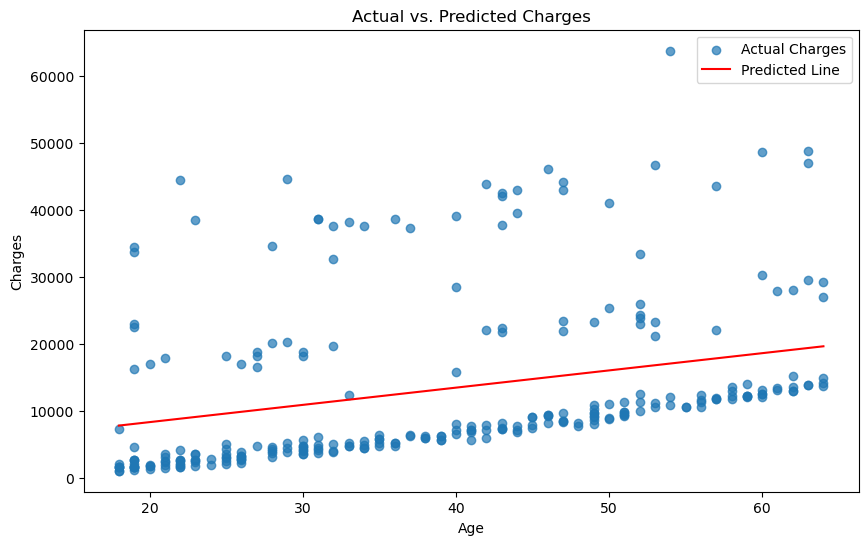

In [9]:
# Create a scatter plot of actual vs. predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(X_test['age'], y_test, label="Actual Charges", alpha=0.7)
plt.plot(age_range, predicted_charges, color='red', label="Predicted Line")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Actual vs. Predicted Charges")
plt.legend()
plt.show()

In [10]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 33981653.95019776
R-squared: 0.7811147722517886
